## Precipitation percentiles - prPercentiles

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy

from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [3]:
from myFuncs import *

### one dataset

In [4]:
metrics = [
    'prPercentiles',
    'prMeanPercentiles'
    ]
metric = metrics[0]

percentile_options= [
    # 'pr95',
    # 'pr97',
    'pr99',
    ]

models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

observations = [
    # 'GPCP'
    ]

datasets = models + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(metric, datasets[0], experiments[0], resolutions[0]))
ds = get_metric(metric, datasets[0], experiments[0], resolution=resolutions[0])
ds

variable:prPercentiles, dataset:GFDL-CM3, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (time: 10950)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Data variables:
    pr95     (time) float64 ...
    pr97     (time) float64 ...
    pr99     (time) float64 ...
    pr999    (time) float64 ...

In [5]:
data = ds[percentile_options[0]]
data

<xarray.DataArray 'pr99' (time: 10950)>
array([25.158648, 28.121631, 26.325661, ..., 29.669944, 33.374901, 31.725548])
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Attributes:
    units:    mm day⁻¹

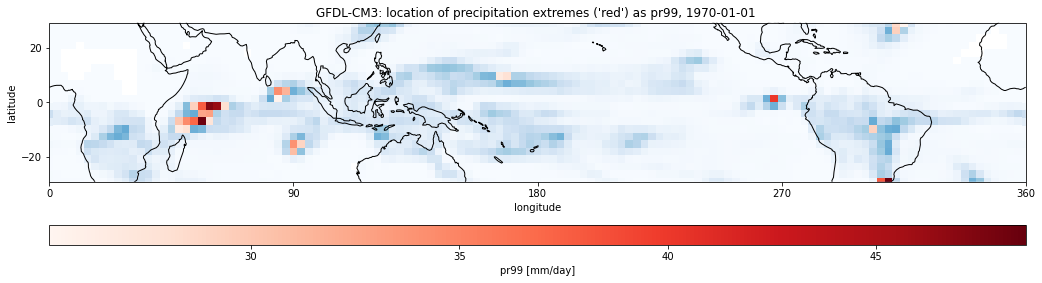

In [6]:
scene = get_dsvariable('precip', datasets[0],experiments[0],home, resolutions[0])['precip'].isel(time=0)

lat = scene.lat
lon = scene.lon
lonm,latm = np.meshgrid(lon,lat)
# conv_threshold = ds['pr97'].mean(dim=('time'))

fig= plt.figure(figsize=(17.5,8))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

ax.add_feature(cartopy.feature.COASTLINE)
ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

extreme_percentileDay = data.isel(time=0).data

# ax.pcolormesh(lonm,latm, scene.where(scene>=conv_threshold),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Blues', vmin=10, vmax=50)
ax.pcolormesh(lonm,latm, scene.where(scene),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Blues') #, vmin=10, vmax=50)
pcm = ax.pcolormesh(lonm,latm, scene.where(scene>extreme_percentileDay),transform=cartopy.crs.PlateCarree(), cmap='Reds')

ax.set_title(datasets[0] + ': location of precipitation extremes (\'red\') as ' + percentile_options[0] + ', ' + str(scene.coords['time'].values)[:11] )
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

ax.set_yticks([-20, 0, 20])
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticklabels([0, 90, 180, 270, 360])

plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = percentile_options[0] + ' [mm/day]')

In [7]:
extreme_percentileDay

array(25.1586483)

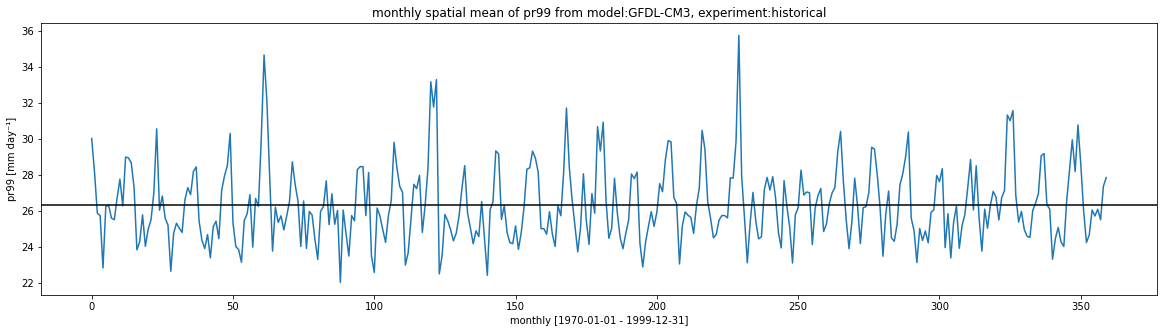

In [8]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

y= data
title = '{} spatial mean of {} from model:{}, experiment:{}'.format(timeMean_options[0], percentile_options[0], datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
ylabel = '{} [{}]'.format(percentile_options[0], data.units)


plot_timeseries(y, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()

### comparing datasets

In [9]:
metric = 'prPercentiles'

models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

observations = [
    'GPCP' # 20
    ]

datasets = models + observations

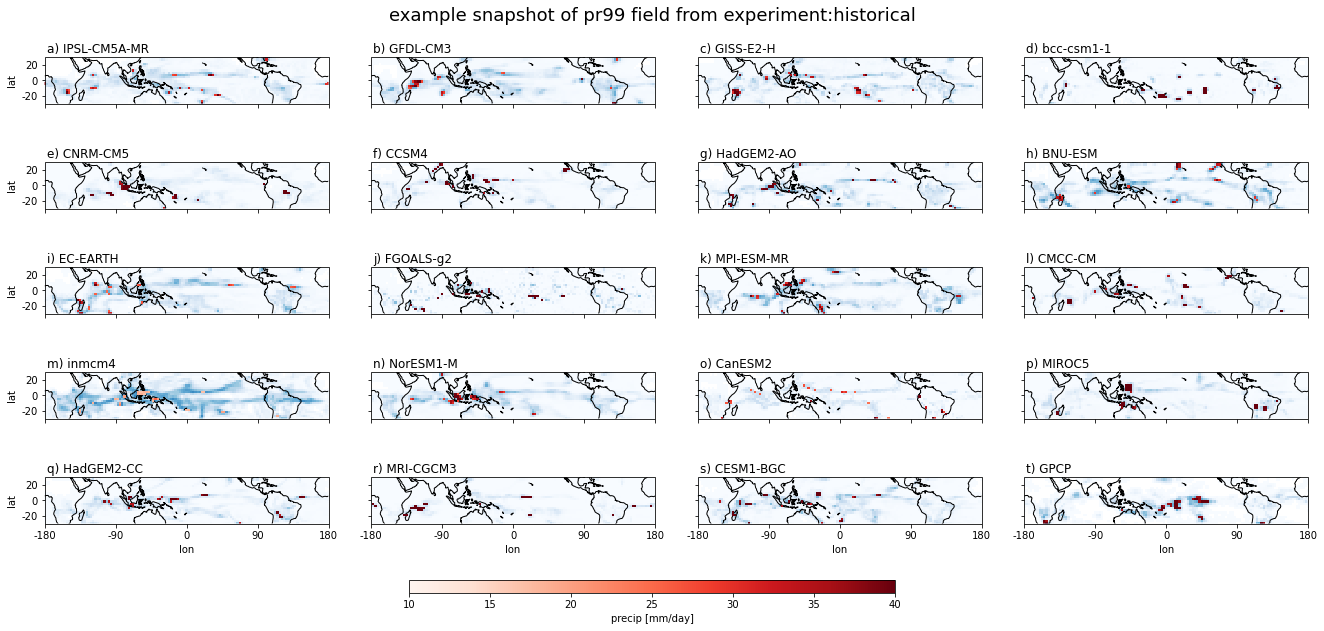

In [10]:
absolute_limits = True
quantile_low = 0
quantile_high = 0.975
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_metric(metric, dataset, experiments[0])[percentile_options[0]].isel(time=0)
        y= data
        
        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 



fig= plt.figure(figsize=(22.5,17.5))
title = 'example snapshot of {} field from experiment:{}'.format(percentile_options[0], experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    scene = get_dsvariable('precip', dataset,experiments[0])['precip'].isel(time=0)
    data = get_metric(metric, dataset, experiments[0])[percentile_options[0]]

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)
    # conv_threshold = ds['pr97'].mean(dim=('time'))

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    extreme_percentileDay = data.isel(time=0).data

    # ax.pcolormesh(lonm,latm, scene.where(scene>=conv_threshold),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Blues', vmin=10, vmax=50)
    ax.pcolormesh(lonm,latm, scene.where(scene),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Blues') #, vmin=10, vmax=50)
    pcm = ax.pcolormesh(lonm,latm, scene.where(scene>extreme_percentileDay),transform=cartopy.crs.PlateCarree(), cmap='Reds',vmin=10, vmax=40)

    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    #     plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.01, aspect=50, fraction=0.055,label = percentile_options[0] + ' [mm/day]')

    # else:
    #     plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.01, aspect=50, fraction=0.055)


    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)
cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('precip', y.units))

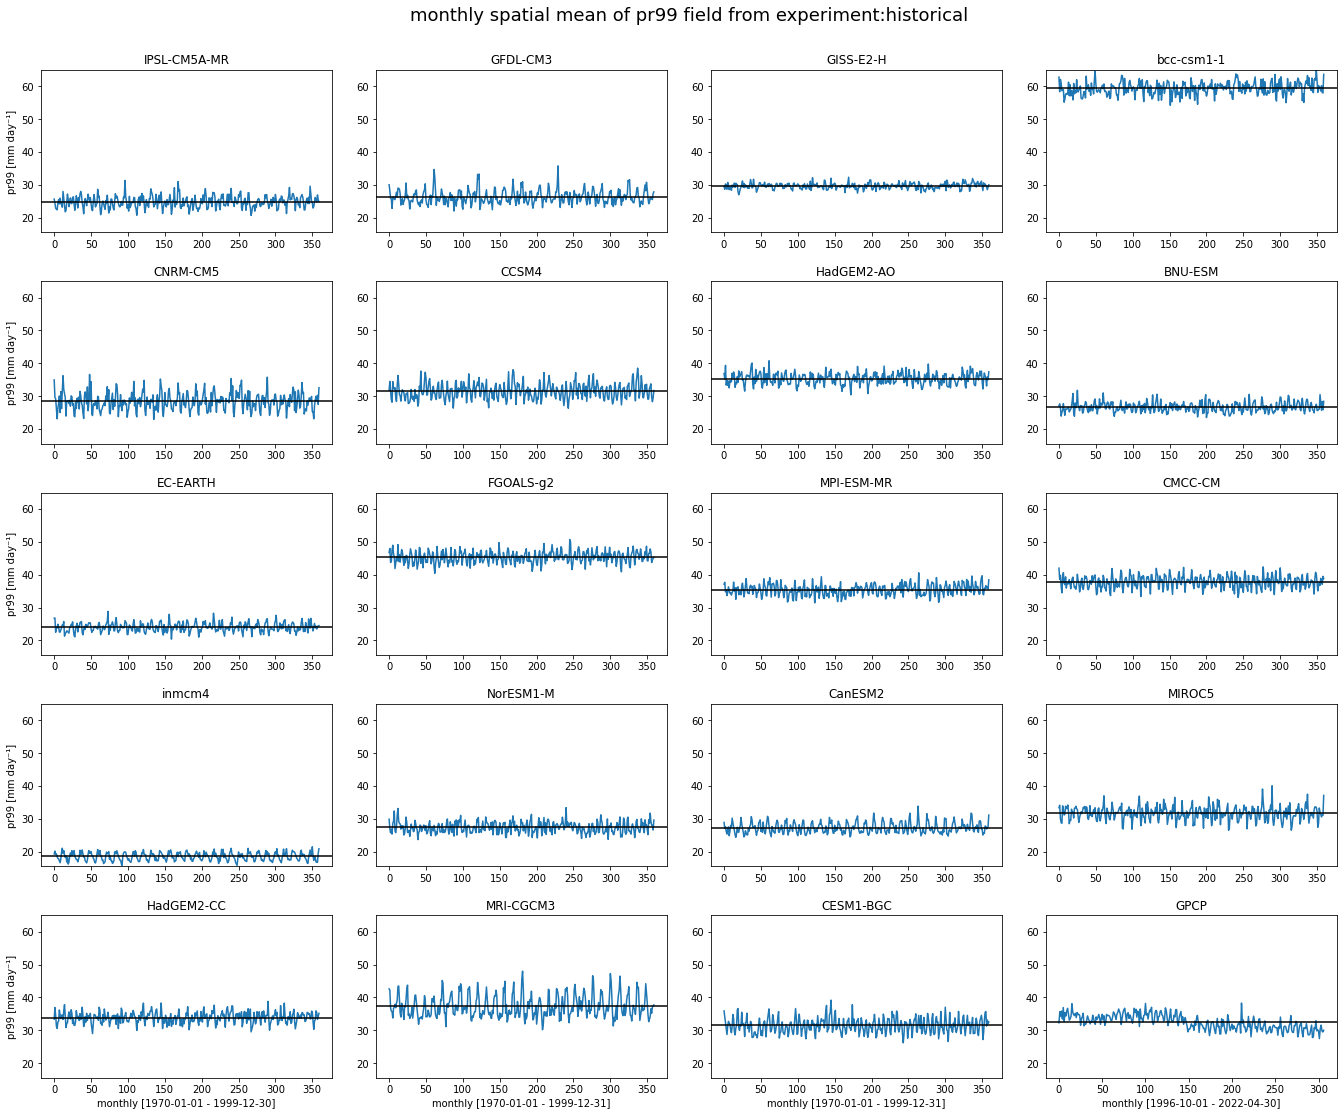

In [11]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_metric(metric, dataset, experiments[0])[percentile_options[0]]
        y= data

        if timeMean_options[0] == 'annual':
            y = y.resample(time='Y').mean(dim='time', keep_attrs=True)

        if timeMean_options[0] == 'seasonal':
            y = y.resample(time='QS-DEC').mean(dim="time")
            y = to_monthly(y)
            y = y.rename({'month':'season'})
            y = y.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])
            y = y.isel(year=slice(1, None))

        if timeMean_options[0] == 'monthly':
            y = y.resample(time='M').mean(dim='time', keep_attrs=True)

        if timeMean_options[0] == 'daily':
            y = y

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} spatial mean of {} field from experiment:{}'.format(timeMean_options[0], percentile_options[0], experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)

    data = get_metric(metric, dataset, experiments[0])[percentile_options[0]]
    y= data

    title = dataset
    plot_timeseries(y, title=title, timeMean_option=timeMean_options, ax=ax, ymin=vmin, ymax=vmax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
        plt.xlabel(xlabel)

        if timeMean_options[0]=='seasonal':
            plt.legend()

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = '{} [{}]'.format(percentile_options[0], data.units)
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

Text(0, 0.5, 'pr99 [mm day⁻¹]')

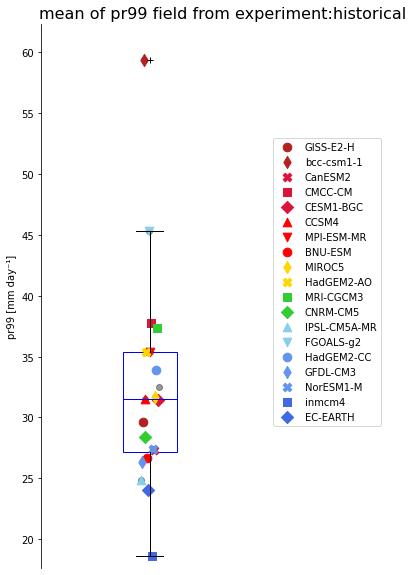

In [14]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

colors = [
    'firebrick', 'firebrick','crimson', 'crimson', 'crimson','red', 'red', 'red', # red
    'gold', 'gold', # yellow
    'limegreen', 'limegreen', # green
    'skyblue', 'skyblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'royalblue', 'royalblue', 'royalblue' # blue
    ]

markers = ['o','d','X','s','D', '^','v']

order_by_tas = True
if order_by_tas:
    order_list = []
    for dataset in datasets:
        if dataset == 'GPCP':
            order_list = np.append(order_list, 0)
        else:
            data = get_metric('tas_tMean', dataset, experiment=experiments[0])['tas_tMean']
            aWeights = np.cos(np.deg2rad(data.lat))
            tas = data.weighted(aWeights).mean(dim=('lat','lon'))
            order_list = np.append(order_list, tas)
    order = np.argsort(order_list)[::-1]
else:
    order = np.arange(len(datasets), dtype=int)
    colors.reverse()


absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_metric(metric, dataset, experiments[0])[percentile_options[0]]
        y = data.mean(dim='time')

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


plt.figure(figsize=(6.5,10))
title = 'mean of {} field from experiment:{}'.format(percentile_options[0], experiments[0])
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:
        
    data = get_metric(metric, dataset, experiments[0])[percentile_options[0]]
    y_data = data.mean(dim='time')

    y = np.append(y, y_data)

plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()
    
    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    
    plt.legend(bbox_to_anchor=(0.95,0.8))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('{} [{}]'.format(percentile_options[0], 'mm day' + chr(0x207B)+ chr(0x00B9)))

Text(0, 0.5, 'pr99 [% K⁻¹]')

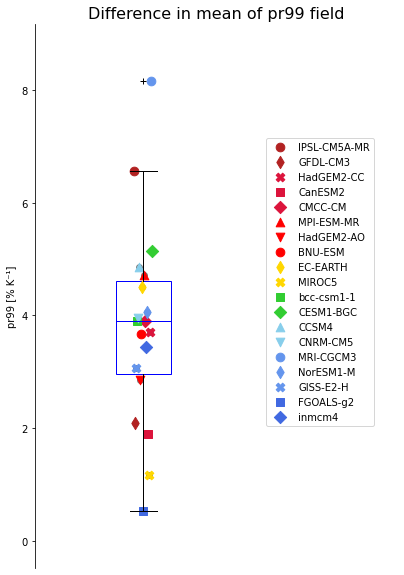

In [13]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

colors = [
    'firebrick', 'firebrick','crimson', 'crimson', 'crimson','red', 'red', 'red', # red
    'gold', 'gold', # yellow
    'limegreen', 'limegreen', # green
    'skyblue', 'skyblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'royalblue', 'royalblue', 'royalblue' # blue
    ]

markers = ['o','d','X','s','D', '^','v']

order_by_tasdiff = True
if order_by_tasdiff:
    order_list = []
    for dataset in datasets:

        if dataset == 'GPCP':
            order_list = np.append(order_list, 0)
        else:
            tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean']
            aWeights = np.cos(np.deg2rad(tas_historical.lat))

            tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
            tas_rcp = get_metric('tas_tMean', dataset, experiment='rcp85')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
            tasdiff = tas_rcp - tas_historical
            order_list = np.append(order_list, tasdiff)
    order = np.argsort(order_list)[::-1]
else:
    order = np.arange(len(datasets), dtype=int)
    colors.reverse()


absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        if dataset == 'GPCP':
            continue
        
        data_historical = get_metric(metric, dataset, experiment='historical')[percentile_options[0]].mean(dim='time')
        data_rcp = get_metric(metric, dataset, experiment='rcp85')[percentile_options[0]].mean(dim='time')

        tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas']
        aWeights = np.cos(np.deg2rad(tas_historical.lat))
        tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))

        datadiff = data_rcp - data_historical
        datadiff = (datadiff/data_historical)*100

        tasdiff = tas_rcp85 - tas_historical
        datadiff = datadiff/tasdiff

        y= datadiff

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 



plt.figure(figsize=(6.5,10))
title = 'Difference in mean {}'.format(percentile_options[0])
plt.xlim(0,1)
plt.ylim(vmin-1, vmax+1)

y= []
for dataset in datasets:

    if dataset == 'GPCP':
        continue

    data_historical = get_metric(metric, dataset, experiment='historical')[percentile_options[0]].mean(dim='time')
    data_rcp = get_metric(metric, dataset, experiment='rcp85')[percentile_options[0]].mean(dim='time')

    tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas']
    aWeights = np.cos(np.deg2rad(tas_historical.lat))
    tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))

    datadiff = data_rcp - data_historical
    datadiff = (datadiff/data_historical)*100

    tasdiff = tas_rcp85 - tas_historical
    datadiff = datadiff/tasdiff

    y = np.append(y, datadiff)
    
plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()
    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)

    plt.legend(bbox_to_anchor=(0.95,0.8))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('{} [{}]'.format(percentile_options[0], '% K'+ chr(0x207B) + chr(0x00B9) ))